# Deep Convolutional Neural Networks (AlexNet)


In [1]:
from d2l import torch as d2l
import torch
from torch import nn

net = nn.Sequential(
    # Here, we use a larger 11 x 11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since we are using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10))

In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

In [3]:
#EX1:
net_Simplified = nn.Sequential(
    # Here, we use a larger 11 x 11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(1, 30, kernel_size=11, stride=4, padding=1), nn.ReLU(), #96==> 30
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(30, 96, kernel_size=5, padding=2), nn.ReLU(), #96==> 30, 256=>96
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(96, 128, kernel_size=3, padding=1), nn.ReLU(), #reduce the 3 layers to 2
    nn.Conv2d(128, 96, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(2400, 2400), nn.ReLU(),
    nn.Dropout(p=0.5), 
    # Output layer. Since we are using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(2400, 10))


In [4]:
X = torch.randn(1, 1, 224, 224)
for layer in net_Simplified:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 30, 54, 54])
ReLU Output shape:	 torch.Size([1, 30, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 30, 26, 26])
Conv2d Output shape:	 torch.Size([1, 96, 26, 26])
ReLU Output shape:	 torch.Size([1, 96, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 96, 12, 12])
Conv2d Output shape:	 torch.Size([1, 128, 12, 12])
ReLU Output shape:	 torch.Size([1, 128, 12, 12])
Conv2d Output shape:	 torch.Size([1, 96, 12, 12])
ReLU Output shape:	 torch.Size([1, 96, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 96, 5, 5])
Flatten Output shape:	 torch.Size([1, 2400])
Linear Output shape:	 torch.Size([1, 2400])
ReLU Output shape:	 torch.Size([1, 2400])
Dropout Output shape:	 torch.Size([1, 2400])
Linear Output shape:	 torch.Size([1, 10])


## Reading the Dataset

Let refer to the Fashion-MNIST DB for reducing the computational time


In [5]:
batch_size = 128

#EX3:
#batch_size = 20 #try with 20 and 256 and compare the results

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

## Training

Main changes (wrt LeNet): 
- use of a smaller learning rate
- much slower training due to 
    - the deeper and wider network,
    - the higher image resolution, 
    - the more costly convolutions.


training on cuda:0


RuntimeError: CUDA out of memory. Tried to allocate 138.00 MiB (GPU 0; 31.75 GiB total capacity; 339.58 MiB already allocated; 12.75 MiB free; 350.00 MiB reserved in total by PyTorch)

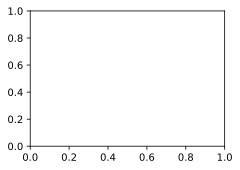

In [6]:
#EX1:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

In [7]:
#EX2:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net_Simplified, train_iter, test_iter, num_epochs, lr)

training on cuda:0


RuntimeError: CUDA out of memory. Tried to allocate 22.00 MiB (GPU 0; 31.75 GiB total capacity; 340.72 MiB already allocated; 12.75 MiB free; 350.00 MiB reserved in total by PyTorch)

## Summary

* AlexNet has a similar structure to that of LeNet, but uses more convolutional layers and a larger parameter space to fit the large-scale ImageNet dataset.
* Today AlexNet has been surpassed by much more effective architectures but it is a key step from shallow to deep networks that are used nowadays.
* Although it seems that there are only a few more lines in AlexNet's implementation than in LeNet, it took the academic community many years to embrace this conceptual change and take advantage of its excellent experimental results. This was also due to the lack of efficient computational tools.
* Dropout, ReLU, and preprocessing were the other key steps in achieving excellent performance in computer vision tasks.



## Exercises

1. Try increasing the number of epochs. Compared with LeNet, how are the results different? Why?
1. AlexNet may be too complex for the Fashion-MNIST dataset. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
1. Modify the batch size, and observe the changes in accuracy and GPU memory.